# All Modules Functionality Workbook

This notebook demonstrates all steps of the workflow: fetching, transforming, training, inference, and simulation.

In [51]:
import pandas as pd

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Check local directory is 05-deployment-and-automation
#!pwd

In [28]:
# workflow settings
FETCH_REPO = True
TRANSFORM_DATA = True
TRAIN_MODEL = True

# 1) Fetching data from API / Loading from a local storage

In [29]:
from scripts.data_repo import DataRepository

repo = DataRepository()

In [30]:
if FETCH_REPO:
  # Fetch All 3 datasets for all dates from APIs
  repo.fetch()
  # save data to a local dir
  repo.persist(data_dir='local_data/')
else:
  # OR Load from disk
  repo.load(data_dir='local_data/')

# DEBUG: Separate fetching of the datasets (YFinance-Tickers, YFinance-Indexes, FRED-Macro)
#repo.fetch_tickers()
#repo.fetch_indexes()
#repo.fetch_macro()

Fetching Tickers info from YFinance
Going download data for this tickers: ['MSFT', 'AAPL', 'GOOG']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Fetching Indexes info from YFinance


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching Macro info from FRED (Pandas_datareader)


In [ ]:
# NOT WORKING YET - need to move all data transformations to Transform

# # Test fetching data with a specific min_date
# min_date = '2024-06-01'
# print(f"\nFetching data from {min_date}:")
# repo.fetch(min_date=min_date)

# repo.ticker_df.Ticker.nunique()

In [31]:
repo.ticker_df.Date.agg({'min','max','count'})

count        220927
max      2024-07-12
min      1972-06-01
Name: Date, dtype: object

In [32]:
repo.ticker_df.Ticker.nunique()

33

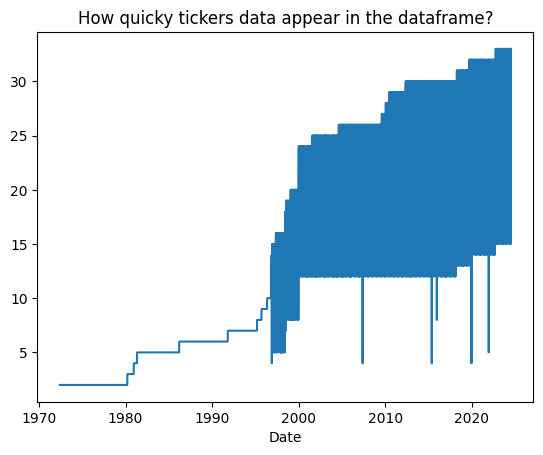

In [33]:
import matplotlib.pyplot as plt
repo.ticker_df.groupby('Date')['Open'].agg('count').plot()
plt.title('How quicky tickers data appear in the dataframe?')
plt.show()


In [34]:
repo.indexes_df.shape

(13752, 43)

In [35]:
repo.indexes_df.tail(1)

growth_snp500_1d  growth_snp500_3d  growth_snp500_7d  \
Date                                                               
2024-07-12          1.005517           1.00688          1.019303   

            growth_snp500_30d  growth_snp500_90d  growth_snp500_365d  \
Date                                                                   
2024-07-12           1.066148           1.094407            1.379503   

            growth_dax_1d  growth_dax_3d  growth_dax_7d  growth_dax_30d  ...  \
Date                                                                     ...   
2024-07-12       1.011525       1.028076       1.020335        1.013528  ...   

            growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  \
Date                                                                            
2024-07-12              1.016866              1.026691               1.001296   

            growth_btc_usd_1d  growth_btc_usd_3d  growth_btc_usd_7d  \
Date                                                                  
2024-07-12            1.00967           0.998108           1.021833   

            growth_btc_usd_30d  growth_btc_usd_90d  growth_btc_usd_365d  \
Date                                                                      
2024-07-12            0.848453             0.90721             1.839477   

            vix_adj_close  
Date                       
2024-07-12          12.46  

[1 rows x 43 columns]

In [36]:
repo.macro_df.tail(1)

bond10  cpi_de_yoy  cpi_de_mom       Date    Quarter  \
DATE                                                                 
2024-05-01  2.511429    0.022298    0.005058 2024-05-01 2024-04-01   

            gdp_de_yoy  gdp_de_qoq  
DATE                                
2024-05-01   -0.002219    0.002136

# 2) Transform all input fields (data_repo dfs) to one dataframe

In [37]:
from scripts.transform import TransformData

transformed =  TransformData(repo = repo)

if TRANSFORM_DATA:
  transformed.transform()
  transformed.persist(data_dir=r'local_data')
else:
  transformed.load(data_dir="local_data/")

VOW3.DE: 100%|██████████| 33/33 [00:06<00:00,  5.34it/s]


In [38]:
transformed.transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177515 entries, 3490 to 6650
Columns: 193 entries, Open to vix_adj_close
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(119), int32(67), int64(3), object(2)
memory usage: 217.4+ MB


In [39]:
transformed.transformed_df.tail(2)

Open        High         Low       Close   Adj Close    Volume  \
6649  106.750000  107.800003  106.199997  107.150002  107.150002  869082.0   
6650  107.550003  108.900002  107.400002  108.550003  108.550003  772086.0   

     ticker_type   Ticker  Year  Month  ...  growth_brent_oil_30d  \
6649          DE  VOW3.DE  2024      7  ...              1.014011   
6650          DE  VOW3.DE  2024      7  ...              1.016866   

     growth_brent_oil_90d  growth_brent_oil_365d  growth_btc_usd_1d  \
6649             1.022142               0.985460           0.993115   
6650             1.026691               1.001296           1.009670   

      growth_btc_usd_3d  growth_btc_usd_7d  growth_btc_usd_30d  \
6649           1.011283           1.006445            0.851674   
6650           0.998108           1.021833            0.848453   

      growth_btc_usd_90d  growth_btc_usd_365d  vix_adj_close  
6649            0.853399             1.886864          12.92  
6650            0.907210             1.839477          12.46  

[2 rows x 193 columns]

In [40]:
# last 3 days of the data
transformed.transformed_df.tail(3)['Date']

6648   2024-07-10 00:00:00+00:00
6649   2024-07-11 00:00:00+00:00
6650   2024-07-12 00:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

# 3) Train the best model 
* Model : Random Forest(max_depth=17, n_estimators=200)

In [42]:
from scripts.train import TrainModel
import warnings

# Suppress all warnings (not recommended in production unless necessary)
warnings.filterwarnings("ignore")

trained = TrainModel(transformed=transformed)

if TRAIN_MODEL:
  trained.prepare_dataframe() # prepare dataframes
  trained.train_random_forest() # train the model
  trained.persist(data_dir='local_data/') # save the model to disk
else:
  trained.prepare_dataframe() # prepare dataframes (incl. for inference)
  trained.load(data_dir='local_data/')


Prepare the dataframe: define feature sets, add dummies, temporal split
length: X_train (137347, 229),  X_validation (19850, 229), X_test (20318, 229)
  X_train_valid = (157197, 229),  all combined: X_all (177515, 229)
Training the best model (RandomForest (max_depth=17, n_estimators=200))


In [44]:
# resulting df
trained.df_full.tail(7)

Open        High         Low       Close   Adj Close     Volume  \
6644  107.000000  108.250000  106.849998  107.599998  107.599998   522707.0   
6645  107.699997  108.449997  106.550003  106.849998  106.849998   711334.0   
6646  107.000000  107.300003  106.199997  106.800003  106.800003   483947.0   
6647  106.250000  107.250000  105.949997  106.599998  106.599998   619664.0   
6648  106.900002  108.500000  104.199997  106.250000  106.250000  1220032.0   
6649  106.750000  107.800003  106.199997  107.150002  107.150002   869082.0   
6650  107.550003  108.900002  107.400002  108.550003  108.550003   772086.0   

     ticker_type   Ticker  Year Month  ... Ticker_SHL.DE Ticker_SIE.DE  \
6644          DE  VOW3.DE  2024     7  ...             0             0   
6645          DE  VOW3.DE  2024     7  ...             0             0   
6646          DE  VOW3.DE  2024     7  ...             0             0   
6647          DE  VOW3.DE  2024     7  ...             0             0   
6648          DE  VOW3.DE  2024     7  ...             0             0   
6649          DE  VOW3.DE  2024     7  ...             0             0   
6650          DE  VOW3.DE  2024     7  ...             0             0   

      Ticker_SU.PA  Ticker_TSLA  Ticker_TTE  Ticker_VOW3.DE  ticker_type_DE  \
6644             0            0           0               1               1   
6645             0            0           0               1               1   
6646             0            0           0               1               1   
6647             0            0           0               1               1   
6648             0            0           0               1               1   
6649             0            0           0               1               1   
6650             0            0           0               1               1   

      ticker_type_EU  ticker_type_US  split  
6644               0               0   test  
6645               0               0   test  
6646               0               0   test  
6647               0               0   test  
6648               0               0   test  
6649               0               0   test  
6650               0               0   test  

[7 rows x 248 columns]

In [45]:
trained.model

RandomForestClassifier(max_depth=17, n_estimators=200, n_jobs=-1,
                       random_state=42)

# 4) Inference

In [46]:
prediction_name='pred_rf_best'
trained.make_inference(pred_name=prediction_name)

Making inference


In [47]:
trained.df_full

Open        High         Low       Close   Adj Close      Volume  \
3490   58.687500   59.312500   56.000000   58.281250   36.000637  53228400.0   
3491   56.781250   58.562500   56.125000   56.312500   34.784527  54119000.0   
3492   55.562500   58.187500   54.687500   56.906250   35.151295  64059600.0   
3493   56.093750   56.937500   54.187500   55.000000   33.973793  54976600.0   
3494   54.312500   56.125000   53.656250   55.718750   34.417759  62013600.0   
...          ...         ...         ...         ...         ...         ...   
6646  107.000000  107.300003  106.199997  106.800003  106.800003    483947.0   
6647  106.250000  107.250000  105.949997  106.599998  106.599998    619664.0   
6648  106.900002  108.500000  104.199997  106.250000  106.250000   1220032.0   
6649  106.750000  107.800003  106.199997  107.150002  107.150002    869082.0   
6650  107.550003  108.900002  107.400002  108.550003  108.550003    772086.0   

     ticker_type   Ticker  Year Month  ... Ticker_SU.PA Ticker_TSLA  \
3490          US     MSFT  2000     1  ...            0           0   
3491          US     MSFT  2000     1  ...            0           0   
3492          US     MSFT  2000     1  ...            0           0   
3493          US     MSFT  2000     1  ...            0           0   
3494          US     MSFT  2000     1  ...            0           0   
...          ...      ...   ...   ...  ...          ...         ...   
6646          DE  VOW3.DE  2024     7  ...            0           0   
6647          DE  VOW3.DE  2024     7  ...            0           0   
6648          DE  VOW3.DE  2024     7  ...            0           0   
6649          DE  VOW3.DE  2024     7  ...            0           0   
6650          DE  VOW3.DE  2024     7  ...            0           0   

      Ticker_TTE  Ticker_VOW3.DE  ticker_type_DE  ticker_type_EU  \
3490           0               0               0               0   
3491           0               0               0               0   
3492           0               0               0               0   
3493           0               0               0               0   
3494           0               0               0               0   
...          ...             ...             ...             ...   
6646           0               1               1               0   
6647           0               1               1               0   
6648           0               1               1               0   
6649           0               1               1               0   
6650           0               1               1               0   

      ticker_type_US  split  pred_rf_best  pred_rf_best_rank  
3490               1  train      0.275155               17.0  
3491               1  train      0.359281               21.0  
3492               1  train      0.407142               20.0  
3493               1  train      0.403592               23.0  
3494               1  train      0.355622               21.0  
...              ...    ...           ...                ...  
6646               0   test      0.484870               32.0  
6647               0   test      0.518511               14.0  
6648               0   test      0.512899               32.0  
6649               0   test      0.509610               16.0  
6650               0   test      0.487379               22.0  

[177515 rows x 250 columns]

In [48]:
COLUMNS = ['Adj Close','Ticker','Date',prediction_name, prediction_name+'_rank']
trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS]

Adj Close Ticker                      Date  pred_rf_best  \
6296  712.000000  MC.PA 2024-07-01 00:00:00+00:00      0.565364   
6297  709.599976  MC.PA 2024-07-02 00:00:00+00:00      0.582540   
6298  405.450012  OR.PA 2024-07-03 00:00:00+00:00      0.557936   
6299  408.000000  OR.PA 2024-07-04 00:00:00+00:00      0.583824   
6300  410.049988  OR.PA 2024-07-05 00:00:00+00:00      0.545232   
3051  529.320007   META 2024-07-08 00:00:00+00:00      0.530182   
6302  400.049988  OR.PA 2024-07-09 00:00:00+00:00      0.540497   
5778  294.149994    ACN 2024-07-10 00:00:00+00:00      0.569033   
6304  710.000000  MC.PA 2024-07-11 00:00:00+00:00      0.558739   
3532  248.229996   TSLA 2024-07-12 00:00:00+00:00      0.530667   

      pred_rf_best_rank  
6296                1.0  
6297                1.0  
6298                1.0  
6299                1.0  
6300                1.0  
3051                1.0  
6302                1.0  
5778                1.0  
6304                1.0  
3532                1.0

In [49]:
print(trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS])

       Adj Close Ticker                      Date  pred_rf_best  \
6296  712.000000  MC.PA 2024-07-01 00:00:00+00:00      0.565364   
6297  709.599976  MC.PA 2024-07-02 00:00:00+00:00      0.582540   
6298  405.450012  OR.PA 2024-07-03 00:00:00+00:00      0.557936   
6299  408.000000  OR.PA 2024-07-04 00:00:00+00:00      0.583824   
6300  410.049988  OR.PA 2024-07-05 00:00:00+00:00      0.545232   
3051  529.320007   META 2024-07-08 00:00:00+00:00      0.530182   
6302  400.049988  OR.PA 2024-07-09 00:00:00+00:00      0.540497   
5778  294.149994    ACN 2024-07-10 00:00:00+00:00      0.569033   
6304  710.000000  MC.PA 2024-07-11 00:00:00+00:00      0.558739   
3532  248.229996   TSLA 2024-07-12 00:00:00+00:00      0.530667   

      pred_rf_best_rank  
6296                1.0  
6297                1.0  
6298                1.0  
6299                1.0  
6300                1.0  
3051                1.0  
6302                1.0  
5778                1.0  
6304                1.0  
35

# 5) Simulation (also can be found in the project_fin.ipynb)

In [57]:
# Function to find all predictions (starting from 'pred'), generate is_correct (correctness of each prediction)
# and precision on TEST dataset (assuming there is df["split"] column with values 'train','validation','test'

# returns 2 lists of features: PREDICTIONS and IS_CORRECT

def get_predictions_correctness(df: pd.DataFrame, to_predict: str):
  PREDICTIONS = [k for k in df.keys() if k.startswith('pred')]
  print(f'Prediction columns founded: {PREDICTIONS}')

  # add columns is_correct_
  for pred in PREDICTIONS:
    part1 = pred.split('_')[0]  # first prefix before '_'
    df[f'is_correct_{part1}'] = (new_df[pred] == new_df[to_predict]).astype(int)

  # IS_CORRECT features set
  IS_CORRECT = [k for k in df.keys() if k.startswith('is_correct_')]
  print(f'Created columns is_correct: {IS_CORRECT}')

  print('Precision on TEST set for each prediction:')
  # define "Precision" for ALL predictions on a Test dataset (~4 last years of trading)
  for i, column in enumerate(IS_CORRECT):
    prediction_column = PREDICTIONS[i]
    is_correct_column = column
    filter = (new_df.split == 'test') & (new_df[prediction_column] == 1)
    print(f'Prediction column:{prediction_column} , is_correct_column: {is_correct_column}')
    print(new_df[filter][is_correct_column].value_counts())
    print(new_df[filter][is_correct_column].value_counts() / len(new_df[filter]))
    print('---------')

  return PREDICTIONS, IS_CORRECT

In [60]:
TO_PREDICT = ['is_positive_growth_3d_future', 'growth_3d_future']
to_predict = TO_PREDICT

In [ ]:
# new prediction is added --> need to recalculate the correctness
PREDICTIONS, IS_CORRECT = get_predictions_correctness(df = trained.df_full, to_predict = to_predict)

In [ ]:
# Total Number of Days (~4 years of trading)
PREDICTIONS

In [ ]:
# check actual future growth with 'growth_future_5d', correctness of the prediction with 'is_positive_growth_5d_future'
TO_PREDICT

In [67]:
# Calculate fin. result for ALL predictions (manual and produced by models)
# Strategy is 50$ investment for each positive prediction (1) for 3 days ahead

investment = 50 # variable for the investement value
yTrad = round(new_df[new_df.split=='test'].Date.nunique()/252,1) # variable for the number of years of trading

sim1_results = []  # results in Array

# Iterate over all predictions
for pred in PREDICTIONS:
    print(f'Calculating sumulation for prediction {pred}:')
    print(
        f"    Count times of investment {len(new_df[(new_df.split == 'test') & (new_df[pred] == 1)])} out of {len(new_df[(new_df.split == 'test')])} TEST records")

    # Prefix: e.g. pred1 or pred10
    pred_prefix = pred.split('_')[0]

    # Fin. result columns: define new records for EACH positive prediction
    new_df['sim1_gross_rev_' + pred_prefix] = new_df[pred] * investment * (new_df['growth_future_3d'] - 1)
    new_df['sim1_fees_' + pred_prefix] = -new_df[pred] * investment * 0.002
    new_df['sim1_net_rev_' + pred_prefix] = new_df['sim1_gross_rev_' + pred_prefix] + new_df['sim1_fees_' + pred_prefix]

    # calculate agg. results for each PREDICTION columns (pred) on TEST
    filter_test_and_positive_pred = (new_df.split == 'test') & (new_df[pred] == 1)  # filter records on TEST set, when current prediction is 1 (we invest $50 for 3 days ahead - 3 periods)
    sim1_count_investments = len(new_df[filter_test_and_positive_pred])
    sim1_gross_rev = new_df[filter_test_and_positive_pred]['sim1_gross_rev_' + pred_prefix].sum()
    sim1_fees = new_df[filter_test_and_positive_pred]['sim1_fees_' + pred_prefix].sum()
    sim1_net_rev = new_df[filter_test_and_positive_pred]['sim1_net_rev_' + pred_prefix].sum()

    if sim1_gross_rev > 0:
        sim1_fees_percentage = -sim1_fees / sim1_gross_rev
    else:
        sim1_fees_percentage = None

    if sim1_count_investments > 0:
        sim1_average_net_revenue = sim1_net_rev / sim1_count_investments
    else:
        sim1_average_net_revenue = None

    # APPROXIMATE CAPITAL REQUIRED and CAGR Calculation
    df_investments_count_daily = pd.DataFrame(new_df[filter_test_and_positive_pred].groupby('Date')[pred].count())
    sim1_avg_investments_per_day = df_investments_count_daily[pred].mean()
    sim1_q75_investments_per_day = df_investments_count_daily[pred].quantile(0.75)  # 75% case - how many $50 investments per day do we have?
    # df_investments_count_daily[pred].mean()
    sim1_capital = investment * 3 * sim1_q75_investments_per_day  # 3 days in a row with positive predictions
    # CAGR: average growth per year. E.g. if you have 1.5 return (50% growth in 4 years) --> (1.5)**(1/4) = 1.106 or 10.6% average
    sim1_CAGR = ((sim1_capital + sim1_net_rev) / sim1_capital) ** (1 / yTrad)

    # append to DF
    sim1_results.append((pred, sim1_count_investments, sim1_gross_rev, sim1_fees, sim1_net_rev, sim1_fees_percentage,
                         sim1_average_net_revenue, sim1_avg_investments_per_day, sim1_capital, sim1_CAGR))

    # output for all predictions with some positive predictions
    if sim1_count_investments > 1:
        print(
            f"    Financial Result: \n {new_df[filter_test_and_positive_pred][['sim1_gross_rev_' + pred_prefix, 'sim1_fees_' + pred_prefix, 'sim1_net_rev_' + pred_prefix]].sum()}")
        print(f"        Count Investments in {yTrad} years (on TEST): {sim1_count_investments}")
        print(f"        Gross Revenue: ${int(sim1_gross_rev)}")
        print(f"        Fees (0.2% for buy+sell): ${int(-sim1_fees)}")
        print(f"        Net Revenue: ${int(sim1_net_rev)}")
        print(f"        Fees are {int(-investment * sim1_fees / sim1_gross_rev)} % from Gross Revenue")
        print(f"        Capital Required : ${int(sim1_capital)} (Vbegin)")
        print(f"        Final value (Vbegin + Net_revenue) : ${int(sim1_capital + sim1_net_rev)} (Vfinal)")

        print(
            f"        Average CAGR on TEST ({yTrad} years) : {np.round(sim1_CAGR, 3)}, or {np.round(100.0 * (sim1_CAGR - 1), 1)}% ")

        print(f"        Average daily stats: ")
        print(f"            Average net revenue per investment: ${np.round(sim1_net_rev / sim1_count_investments, 2)} ")
        print(f"            Average investments per day: {int(np.round(sim1_avg_investments_per_day))} ")
        print(f"            Q75 investments per day: {int(np.round(sim1_q75_investments_per_day))} ")
        print('=============================================+')

# results in a DataFrame from an Array
columns_simulation = ['prediction', 'sim1_count_investments', 'sim1_gross_rev', 'sim1_fees', 'sim1_net_rev',
                      'sim1_fees_percentage', 'sim1_average_net_revenue', 'sim1_avg_investments_per_day',
                      'sim1_capital', 'sim1_CAGR']

df_sim1_results = pd.DataFrame(sim1_results, columns=columns_simulation)

Calculating sumulation for prediction pred1_clf_15:
    Count times of investment 11428 out of 20318 TEST records
    Financial Result: 
 sim1_gross_rev_pred1    1638.24774
sim1_fees_pred1        -1142.80000
sim1_net_rev_pred1       495.44774
dtype: float64
        Count Investments in 2.5 years (on TEST): 11428
        Gross Revenue: $1638
        Fees (0.2% for buy+sell): $1142
        Net Revenue: $495
        Fees are 34 % from Gross Revenue
        Capital Required : $4800 (Vbegin)
        Final value (Vbegin + Net_revenue) : $5295 (Vfinal)
        Average CAGR on TEST (2.5 years) : 1.04, or 4.0% 
        Average daily stats: 
            Average net revenue per investment: $0.04 
            Average investments per day: 21 
            Q75 investments per day: 32 
=============================================+
Calculating sumulation for prediction pred2_rf_best:
    Count times of investment 17054 out of 20318 TEST records
    Financial Result: 
 sim1_gross_rev_pred2    2414.9934